# Hotel Cancellation
Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model


### About
The newly available datasets were originally collected to develop prediction models for assessing the likelihood of hotel booking cancellations. However, due to the nature of the variables included in these datasets, their potential applications extend beyond just predicting cancellations.

In [1]:
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_parquet('hotel_bookings.parquet')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
for col in data.columns:

    print(f"{col}: {data[col].dtypes}")

hotel: object
is_canceled: int64
lead_time: int64
arrival_date_year: int64
arrival_date_month: object
arrival_date_week_number: int64
arrival_date_day_of_month: int64
stays_in_weekend_nights: int64
stays_in_week_nights: int64
adults: int64
children: float64
babies: int64
meal: object
country: object
market_segment: object
distribution_channel: object
is_repeated_guest: int64
previous_cancellations: int64
previous_bookings_not_canceled: int64
reserved_room_type: object
assigned_room_type: object
booking_changes: int64
deposit_type: object
agent: float64
company: float64
days_in_waiting_list: int64
customer_type: object
adr: float64
required_car_parking_spaces: int64
total_of_special_requests: int64
reservation_status: object
reservation_status_date: object


In [4]:
missing_values=data.isnull().sum()
percentage_missing=(missing_values/data.shape[0]).reset_index().rename(columns={0:"percentage_missing"}).sort_values("percentage_missing",ascending=False)
percentage_missing


,index,percentage_missing
24,company,0.943069
23,agent,0.136862
13,country,0.004087
10,children,0.000034
19,reserved_room_type,0.000000
20,assigned_room_type,0.000000
21,booking_changes,0.000000
22,deposit_type,0.000000
0,hotel,0.000000
17,previous_cancellations,0.000000


In [5]:
cols_with_missing_val=list(percentage_missing[percentage_missing["percentage_missing"]>0]['index'])

for col in cols_with_missing_val:

    print(f"{col}: {data[col].nunique()}")
    print("###########################################")

company: 352
###########################################
agent: 333
###########################################
country: 177
###########################################
children: 5
###########################################


In [6]:
data['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.629584
1    0.370416
Name: proportion, dtype: float64

In [7]:
numerical_features=[col for col in data.columns if data[col].dtypes!='O']
categorical_features=[col for col in data.columns if data[col].dtypes=='O']

print(len(numerical_features))
print(len(categorical_features))

20
12


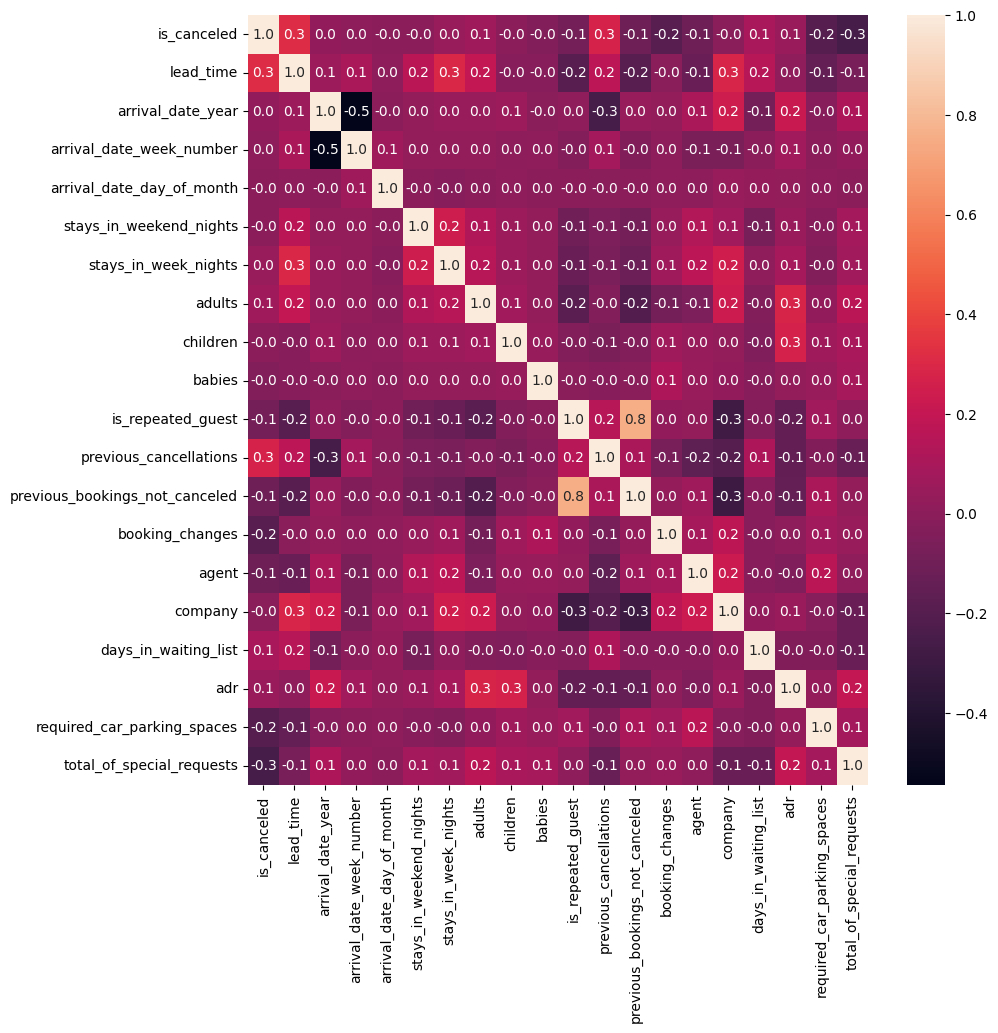

In [8]:
correlation_matrix=data[numerical_features].corr('spearman')

plt.figure(figsize=(10,10))

sns.heatmap(data=correlation_matrix, annot=True,fmt='.1f')

plt.show()

In [16]:
data['children'].value_counts(normalize=True)

children
0.0     0.928049
1.0     0.040717
2.0     0.030590
3.0     0.000637
10.0    0.000008
Name: proportion, dtype: float64

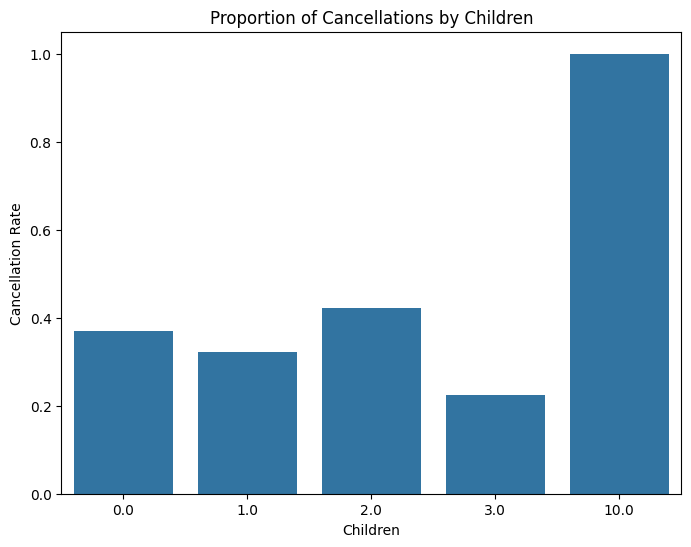

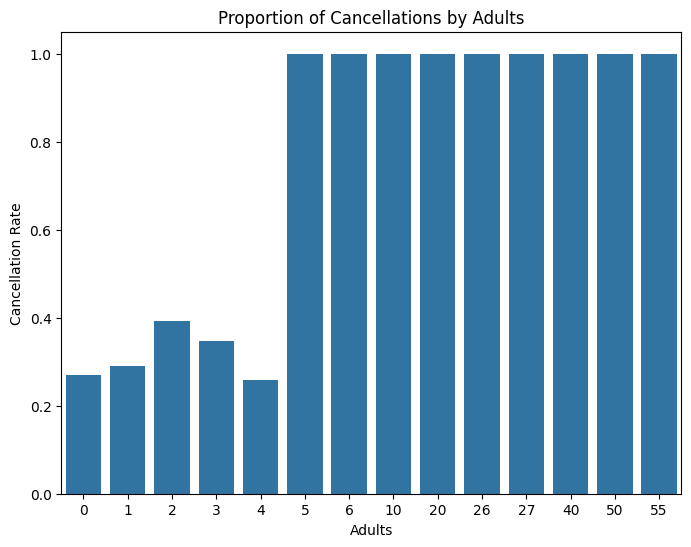

In [23]:
# maybe we can check relation with is_cancelled and familly features

familly_features=['children','adults']

for col in familly_features:
    proportion = data.groupby(col)['is_canceled'].mean().reset_index().sort_values(by="is_canceled",ascending=True)
    plt.figure(figsize=(8, 6))
    sns.barplot(x=col, y='is_canceled', data=proportion)
    plt.title(f'Proportion of Cancellations by {col.capitalize()}')
    plt.ylabel('Cancellation Rate')
    plt.xlabel(col.capitalize())
    plt.show()


In [38]:
data.groupby('customer_type')['adults'].mean().reset_index()

,customer_type,adults
0,Contract,1.919529
1,Group,2.346620
2,Transient,1.886791
3,Transient-Party,1.726516


<Figure size 1000x1000 with 0 Axes>

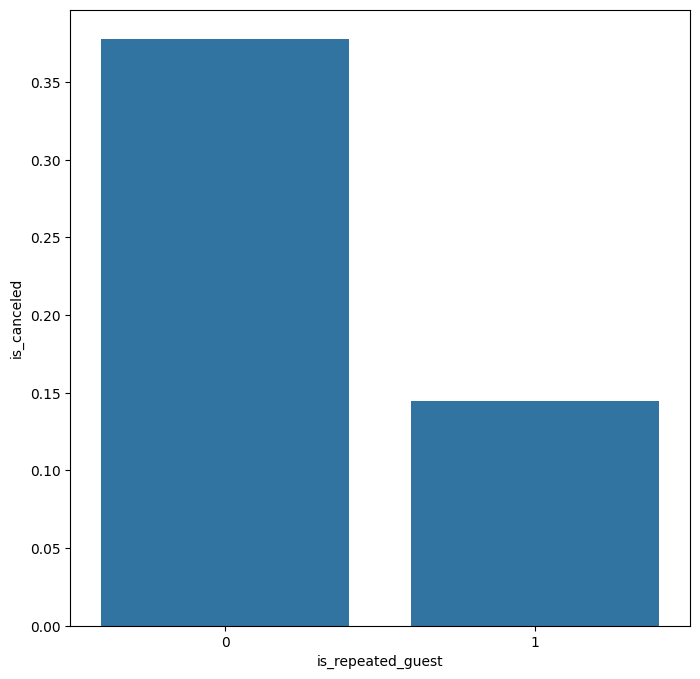

In [44]:
plt.figure(figsize=(10,10))

is_repeated=data.groupby('is_repeated_guest')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8,8))

sns.barplot(x='is_repeated_guest',y='is_canceled',data=is_repeated)

plt.show()

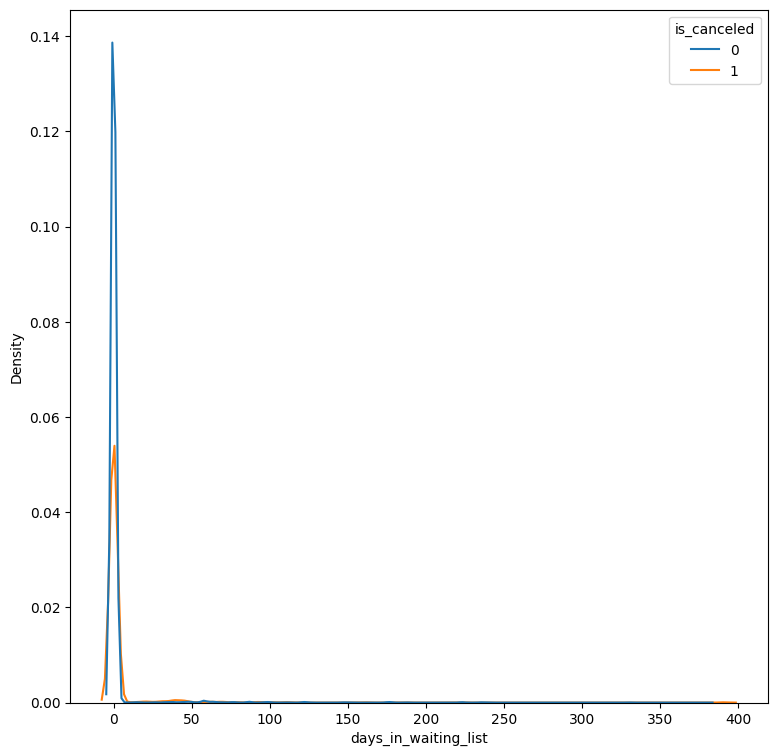

In [49]:
plt.figure(figsize=(9,9))

sns.kdeplot(data=data,x='days_in_waiting_list',hue='is_canceled')

plt.show()

In [51]:
data.groupby('is_canceled')['days_in_waiting_list'].mean().reset_index()

,is_canceled,days_in_waiting_list
0,0,1.589868
1,1,3.564083


In [52]:
categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

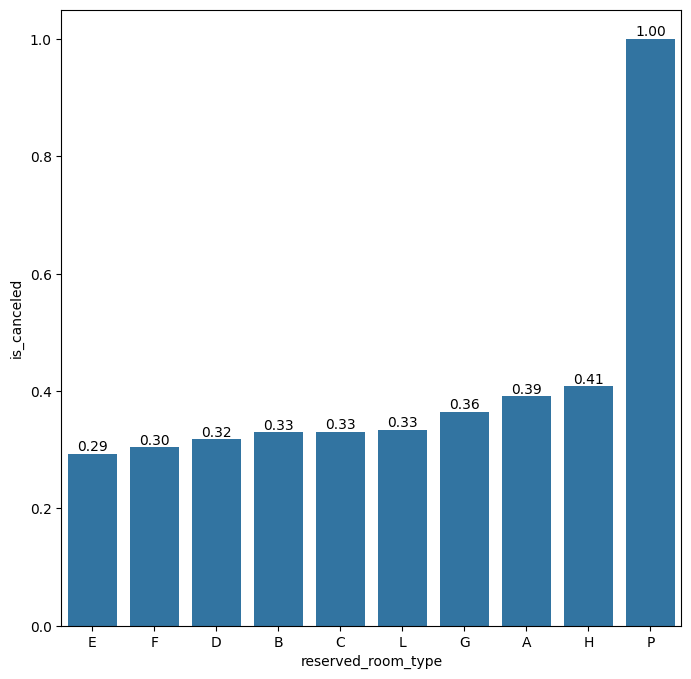

In [72]:
reserved_room=data.groupby('reserved_room_type')['is_canceled'].mean().reset_index().sort_values(by='is_canceled')

plt.figure(figsize=(8,8))

sns.barplot(data=reserved_room,x='reserved_room_type',y='is_canceled')

for index, value in enumerate(reserved_room['is_canceled']):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()

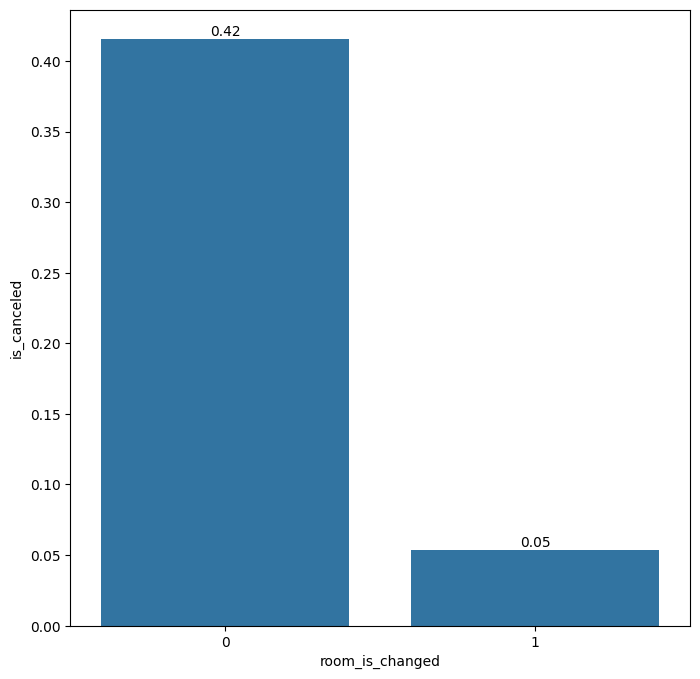

In [80]:
data["room_is_changed"]=np.where(data['reserved_room_type']!=data['assigned_room_type'],1,0)

room_changes=data.groupby("room_is_changed")['is_canceled'].mean().reset_index()



plt.figure(figsize=(8,8))

sns.barplot(x='room_is_changed',y='is_canceled',data=room_changes)

for index,values in enumerate(room_changes['is_canceled']):

    plt.text(index,values,f'{values:.2f}',ha='center',va='bottom')

plt.show()



In [94]:
data.groupby('reserved_room_type')[['children','babies','adults']].mean().reset_index().sort_values('children',ascending=False)

,reserved_room_type,children,babies,adults
6,G,1.275549,0.031041,2.077841
2,C,1.271459,0.070815,2.039700
5,F,1.030376,0.015878,1.992406
7,H,0.980033,0.014975,2.712146
1,B,0.552962,0.012522,1.569767
4,E,0.091813,0.012854,1.980260
3,D,0.040727,0.009375,2.088902
0,A,0.034595,0.005640,1.781101
8,L,0.000000,0.000000,2.166667
9,P,0.000000,0.000000,0.000000


In [106]:
data['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [111]:
def reservation_season(date:str):

    season={'winter': ['December', 'January', 'February'],
            'Spring': ['March','April','May'],
            'Summer':['June','July','August'],
            'Autumn':['September','October','November']
    }

    for key, val in season.items():

        if date in val:

            return key


In [112]:
data["Arrival_season"]=data['arrival_date_month'].apply(reservation_season)

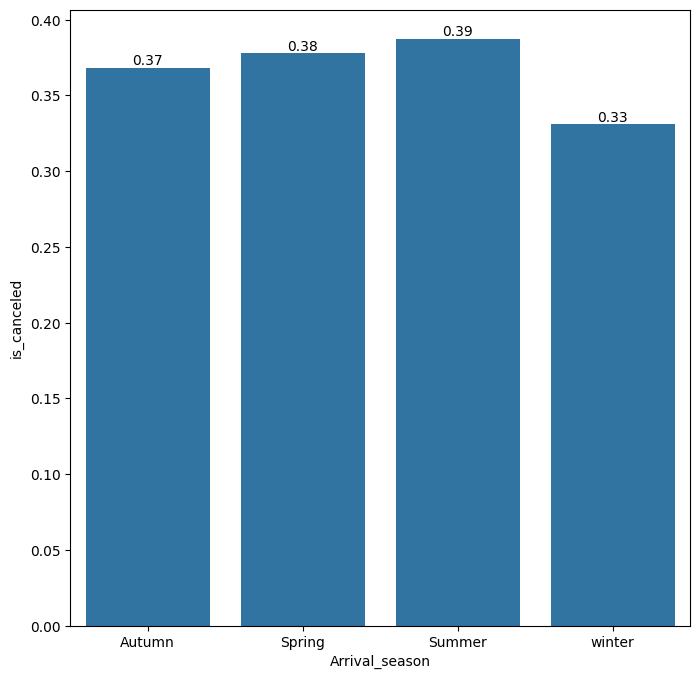

In [119]:
season_cancellation=data.groupby('Arrival_season')['is_canceled'].mean().reset_index()

plt.figure(figsize=(8,8))

sns.barplot(data=season_cancellation,x='Arrival_season',y='is_canceled')

for index,value in enumerate(season_cancellation['is_canceled']):

    plt.text(index,value,f'{value:.2f}',ha='center',va='bottom')

plt.show()

In [149]:
categorical_features.append('Arrival_season')

In [125]:
continuous_features=[features for features in numerical_features if len(data[features].unique())>=25]
discrete_features=[features for features in numerical_features if len(data[features].unique())<25]
discrete_features

['is_canceled',
 'arrival_date_year',
 'stays_in_weekend_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'booking_changes',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [150]:
from scipy.stats import chi2_contingency

result={}



target='is_canceled'

for col in categorical_features:

    corsstable=pd.crosstab(data[col],data[target])

    chi2,pval,_,_=chi2_contingency(corsstable)

    if pval<0.05:

        #calculate index of cramer

        n=corsstable.sum().sum()
        num_cols=corsstable.shape[1]
        num_row=corsstable.shape[0]

        cramer=((chi2/n)/min(num_cols-1,num_row-1))**0.5

        result[col]=cramer

    else:

        continue

chi2_result=pd.DataFrame.from_dict(result,orient='index').rename(columns={0:'cramer index'})
chi2_result.sort_values(by='cramer index',ascending=False)




,cramer index
reservation_status,1.000000
reservation_status_date,0.487923
deposit_type,0.481480
country,0.360292
market_segment,0.266781
assigned_room_type,0.202974
distribution_channel,0.177128
hotel,0.136513
customer_type,0.136439
reserved_room_type,0.073663


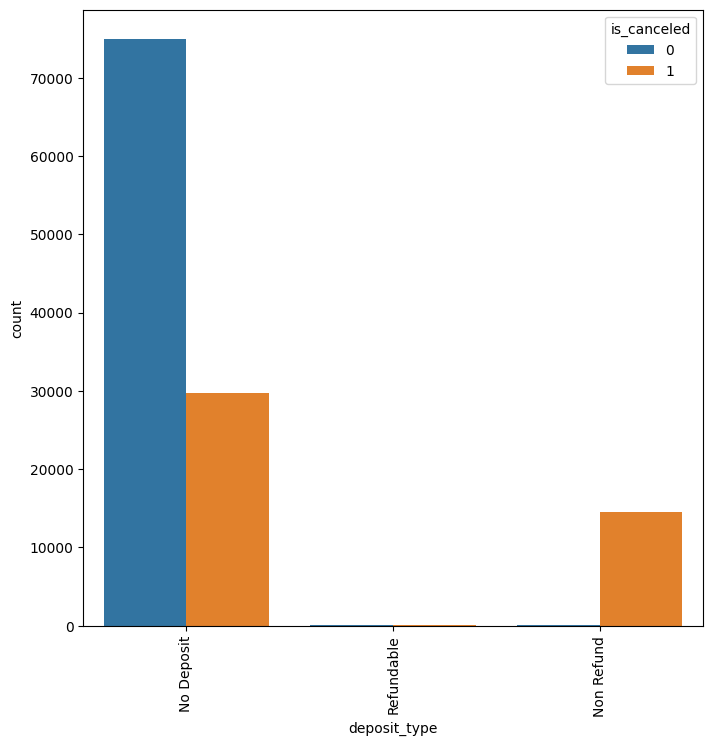

In [169]:
plt.figure(figsize=(8,8))

sns.countplot(data=data,x='deposit_type',hue='is_canceled')

plt.xticks(rotation=90)

plt.show()

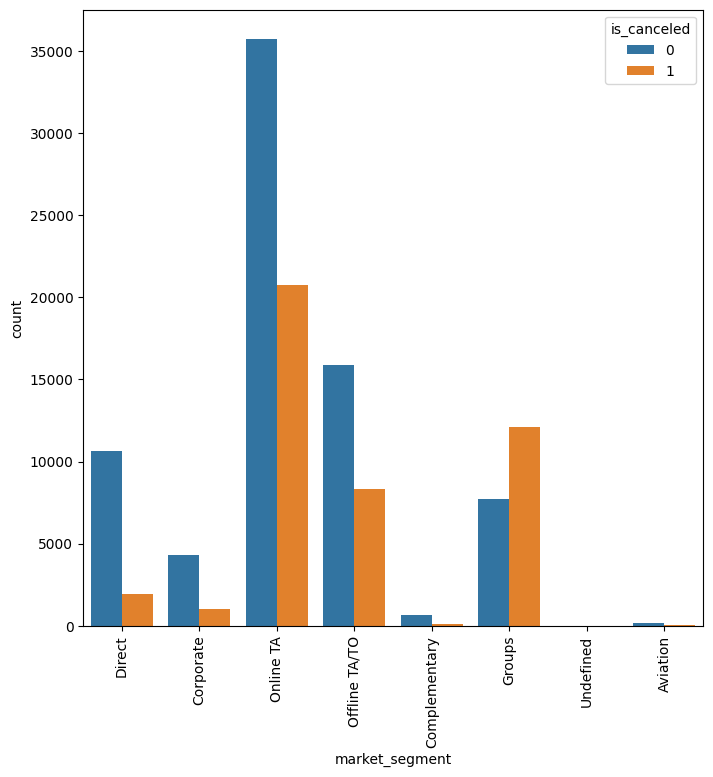

In [166]:
plt.figure(figsize=(8,8))

sns.countplot(data=data,x='market_segment',hue='is_canceled')

plt.xticks(rotation=90)

plt.show()

In [162]:
data.groupby(['Arrival_season','market_segment'])['is_canceled'].mean().to_frame()

is_canceled
Arrival_season market_segment             
Autumn         Aviation           0.233333
               Complementary      0.134715
               Corporate          0.166556
               Direct             0.158730
               Groups             0.594152
               Offline TA/TO      0.353890
               Online TA          0.327040
Spring         Aviation           0.173913
               Complementary      0.172043
               Corporate          0.165242
               Direct             0.139317
               Groups             0.569355
               Offline TA/TO      0.363886
               Online TA          0.374344
Summer         Aviation           0.296296
               Complementary      0.091463
               Corporate          0.236988
               Direct             0.178303
               Groups             0.715434
               Offline TA/TO      0.331242
               Online TA          0.394198
               Undefined          1.000000
winter         Aviation           0.250000
               Complementary      0.120000
               Corporate          0.199059
               Direct             0.125133
               Groups             0.584299
               Offline TA/TO      0.310815
               Online TA          0.343587

In [171]:
chi2_result

,cramer index
hotel,0.136513
arrival_date_month,0.070220
meal,0.050480
country,0.360292
market_segment,0.266781
distribution_channel,0.177128
reserved_room_type,0.073663
assigned_room_type,0.202974
deposit_type,0.481480
customer_type,0.136439


In [177]:
data.filter(regex='date')




,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,reservation_status_date
0,2015,July,27,1,2015-07-01
1,2015,July,27,1,2015-07-01
2,2015,July,27,1,2015-07-02
3,2015,July,27,1,2015-07-02
4,2015,July,27,1,2015-07-03
...,...,...,...,...,...
119385,2017,August,35,30,2017-09-06
119386,2017,August,35,31,2017-09-07
119387,2017,August,35,31,2017-09-07
119388,2017,August,35,31,2017-09-07


# Conclusion

- I'll drop hotel, reservation_status,reservation_status_date,'arrival_date_year', agent and company
- is_canceled data is imbalanced can be handled before model building